In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from plotApeConfig import set_default_plot_params, blueAPE
set_default_plot_params()

The effective lateral confinement is given by:

$
f'_l=k_e f_l
\tag{10}
$

# Determine the increase in confinement given by spirals:

$
\frac{
1-\frac{s'}{2d_s}
}
{1-\rho_{cc}}
$

and the confinement given by the circular hoops:

$
\frac{
\left(
1-\frac{s'}{2d_s}
\right
)^2
}
{1-\rho_{cc}}
$

Calculating the ratio:

$
\frac{k_{spiral}}{k_{circular}}=
\frac{d_s}{d_s-s'/2}
$

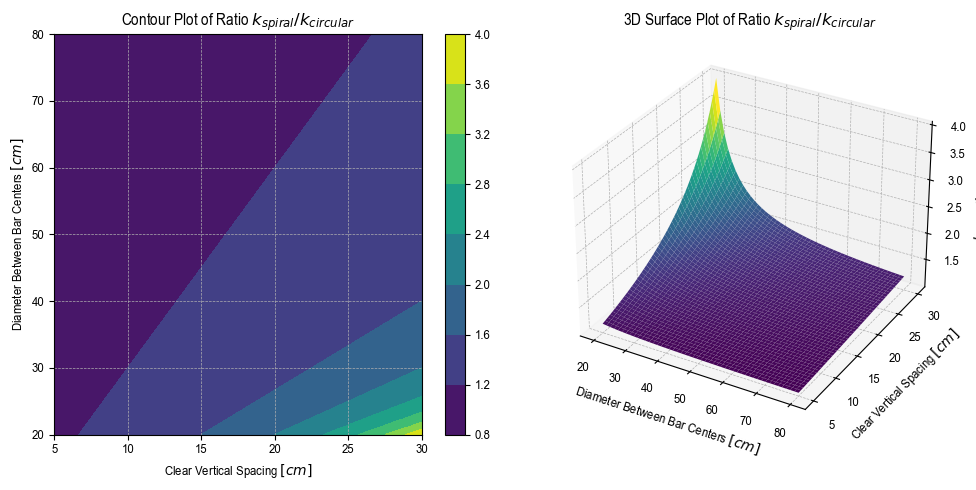

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ds_array = np.linspace(20, 80, 50)
s_spacing = np.linspace(5, 30, 50)

def calculate_ratio(ds, s):
    ratio = ds / (ds - s / 2)
    return ratio

# Create a meshgrid for ds and s
ds, s = np.meshgrid(ds_array, s_spacing)

# Calculate the ratio for each combination of ds and s
ratios = calculate_ratio(ds, s)

# Create the figure
fig = plt.figure(figsize=(10, 5))

# Subplot 1: Contour plot
ax1 = fig.add_subplot(1, 2, 1)
contour = ax1.contourf(s, ds, ratios, cmap='viridis')
fig.colorbar(contour, ax=ax1)
ax1.set_xlabel(r'Clear Vertical Spacing $[cm]$')
ax1.set_ylabel(r'Diameter Between Bar Centers $[cm]$')
ax1.set_title(r'Contour Plot of Ratio $k_{spiral}/k_{circular}$')

# Subplot 2: 3D surface plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(ds, s, ratios, cmap='viridis')
# Commented out the color bar for the 3D plot
# fig.colorbar(surf, ax=ax2, shrink=0.75, aspect=5)
ax2.set_xlabel(r'Diameter Between Bar Centers $[cm]$')
ax2.set_ylabel(r'Clear Vertical Spacing $[cm]$')
ax2.set_zlabel(r'$k_{spiral}/k_{circular}$')
ax2.set_title(r'3D Surface Plot of Ratio $k_{spiral}/k_{circular}$')

plt.tight_layout()
plt.show()


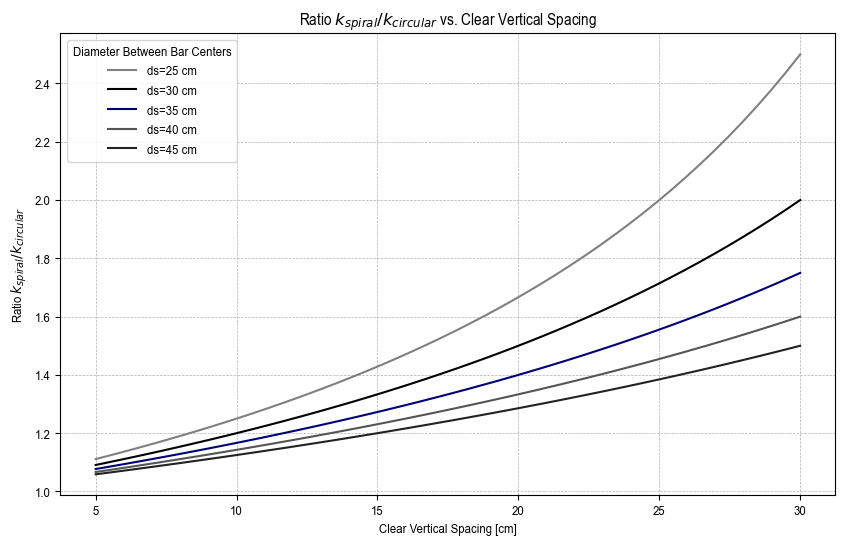

In [29]:
# Provided data
ds_given = np.array([25, 30, 35, 40, 45])

# Initialize an array to save the ratios
saved_ratios = np.zeros((len(ds_given), len(s_spacing)))

# Define custom colors for each line
colors = ['grey', 'black', '#000077', '#555555', '#222222']

# Calculate and plot the ratios for each ds
plt.figure(figsize=(10, 6))
for i, (ds, color) in enumerate(zip(ds_given, colors)):
    saved_ratios[i, :] = calculate_ratio(ds, s_spacing)
    plt.plot(s_spacing, saved_ratios[i, :], label=f'ds={ds} cm', color=color)

# Add labels, title, and legend
plt.xlabel('Clear Vertical Spacing [cm]')
plt.ylabel('Ratio $k_{spiral}/k_{circular}$')
plt.title('Ratio $k_{spiral}/k_{circular}$ vs. Clear Vertical Spacing')
plt.legend(title='Diameter Between Bar Centers')
plt.grid(True)

# Show the plot
plt.show()